In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
df = pd.read_csv("/content/emotions.csv")

In [ ]:
df

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


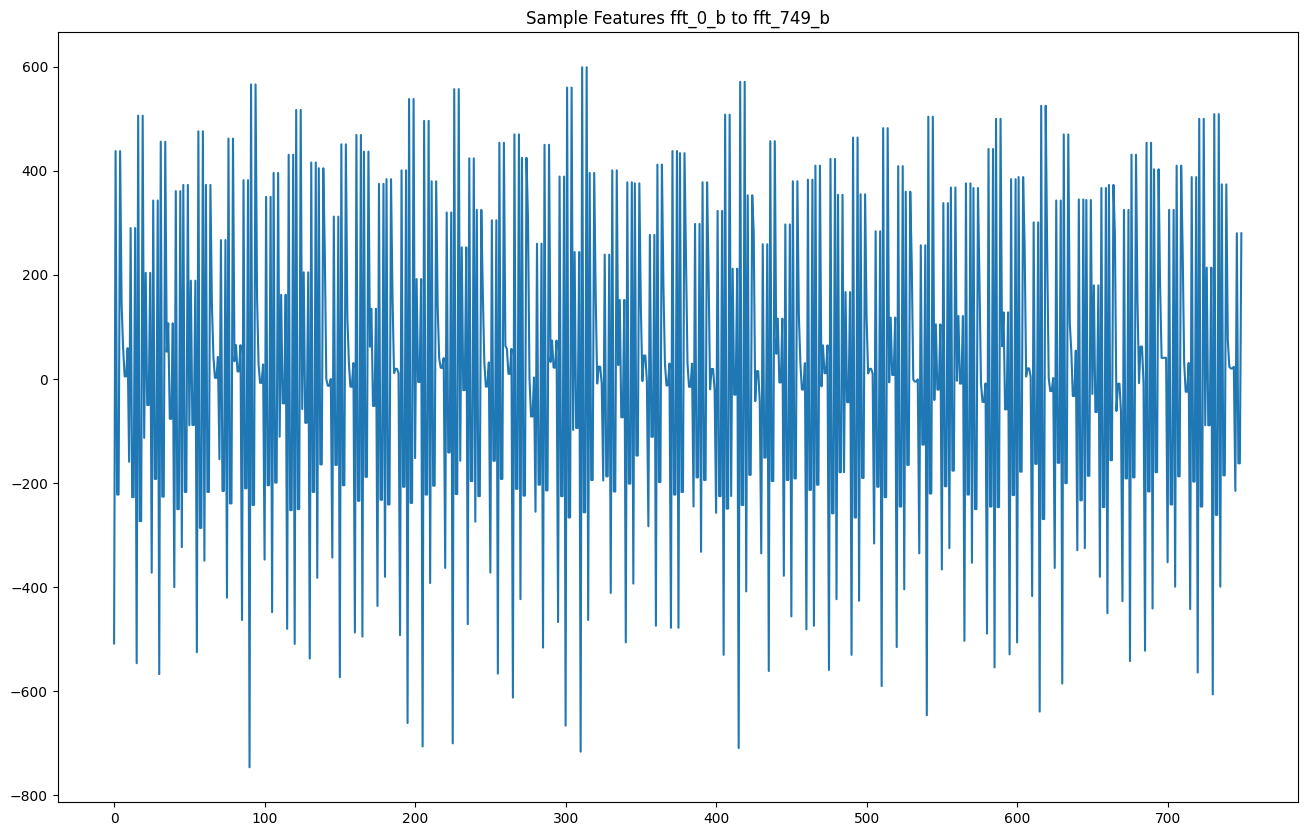

In [ ]:
sample_fft = df.loc[0 , "fft_0_b" : "fft_749_b"]
plt.figure(figsize=(16 , 10))
plt.title("Sample Features fft_0_b to fft_749_b")
plt.plot(range(len(sample_fft)) , sample_fft)
plt.show()

In [ ]:
df["label"].value_counts()

label
NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: count, dtype: int64

In [ ]:
mapping_label = {"NEUTRAL" : 0 , "NEGATIVE" : 1 , "POSITIVE" : 2}

In [ ]:
def preprocess_inputs(df):
    df = df.copy()
    df['label'] = df['label'].replace(mapping_label)

    y = df['label'].copy()
    X = df.drop('label', axis=1).copy()

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

    return X_train, X_test, y_train, y_test

In [ ]:
x_train , x_test , y_train , y_test = preprocess_inputs(df)

In [ ]:
x_train

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
993,14.400,29.7,-112.0,18.50,22.9,-3.63000,-2.2200,-2.180,-3.240,-4.040,...,-50.0,150.00,-150.00,-150.00,150.00,63.6,83.80,-40.90,-40.90,83.80
1851,13.700,22.8,21.5,8.40,27.1,3.27000,1.1200,6.480,2.300,5.660,...,74.2,-76.00,-10.90,-10.90,-76.00,60.9,-60.40,-31.40,-31.40,-60.40
1253,-0.765,24.7,-578.0,11.90,27.9,-1.44000,-4.2000,-8.310,-4.340,4.040,...,-803.0,619.00,-331.00,-331.00,619.00,-551.0,545.00,-261.00,-261.00,545.00
1228,28.200,32.6,32.1,30.30,24.6,-0.00524,-0.0699,1.680,0.266,-4.470,...,167.0,-24.40,-18.10,-18.10,-24.40,181.0,4.94,-8.33,-8.33,4.94
1461,31.900,31.0,34.4,30.80,24.0,-4.74000,-1.4000,-0.351,-1.830,-5.390,...,130.0,-25.70,4.10,4.10,-25.70,131.0,-21.70,19.60,19.60,-21.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.820,32.9,-741.0,32.60,27.0,-0.41300,-2.6300,-87.300,-26.200,-3.350,...,-405.0,428.00,-160.00,-160.00,428.00,-468.0,451.00,-229.00,-229.00,451.00
1147,31.500,32.1,31.3,28.80,25.0,5.32000,-0.1400,1.370,5.610,8.300,...,132.0,-22.20,33.00,33.00,-22.20,148.0,-9.15,16.50,16.50,-9.15
1766,-11.800,26.3,-828.0,7.68,23.3,13.10000,-2.0100,21.900,2.890,-3.160,...,-579.0,640.00,-238.00,-238.00,640.00,-361.0,451.00,-195.00,-195.00,451.00
1122,27.600,32.2,28.8,25.60,24.1,-6.94000,1.0300,0.355,-8.380,-6.960,...,102.0,6.75,9.95,9.95,6.75,101.0,-25.90,42.90,42.90,-25.90


In [ ]:
inputs = tf.keras.Input(shape=(x_train.shape[1],))
expand_dim = tf.expand_dims(inputs , axis = 2)
gru = tf.keras.layers.GRU(256 , return_sequences=True)(expand_dim)
gr_flat = tf.keras.layers.Flatten()(gru)
outputs = tf.keras.layers.Dense(3 , activation="softmax")(gr_flat)
model = tf.keras.Model(inputs = inputs , outputs=outputs)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims (TFOpLambda  (None, 2548, 1)           0         
 )                                                               
                                                                 
 gru (GRU)                   (None, 2548, 256)         198912    
                                                                 
 flatten (Flatten)           (None, 652288)            0         
                                                                 
 dense (Dense)               (None, 3)                 1956867   
                                                                 
Total params: 2155779 (8.22 MB)
Trainable params: 2155779 (8.22 MB)
Non-trainable params: 0 (0.00 Byte)
_______________________

In [ ]:
model.compile(optimizer="adam" , loss="sparse_categorical_crossentropy" , metrics=["accuracy"])
history = model.fit(
    x_train , y_train, validation_split = 0.2 , batch_size = 32 , epochs = 50 ,
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor = "val_loss" , patience = 5 , restore_best_weights=True)]
)

Epoch 1/50
38/38 [==============================] - 261s 7s/step - loss: 29.5911 - accuracy: 0.7569 - val_loss: 14.5882 - val_accuracy: 0.8863
Epoch 2/50
38/38 [==============================] - 245s 6s/step - loss: 13.2756 - accuracy: 0.8919 - val_loss: 4.4157 - val_accuracy: 0.9398
Epoch 3/50
38/38 [==============================] - 269s 7s/step - loss: 5.6051 - accuracy: 0.9246 - val_loss: 3.1158 - val_accuracy: 0.9532
Epoch 4/50
38/38 [==============================] - 248s 7s/step - loss: 0.5872 - accuracy: 0.9807 - val_loss: 1.5842 - val_accuracy: 0.9565
Epoch 5/50
38/38 [==============================] - 251s 7s/step - loss: 0.3895 - accuracy: 0.9841 - val_loss: 6.9664 - val_accuracy: 0.9197
Epoch 6/50
38/38 [==============================] - 243s 6s/step - loss: 0.1974 - accuracy: 0.9925 - val_loss: 1.9134 - val_accuracy: 0.9532
Epoch 7/50
38/38 [==============================] - 242s 6s/step - loss: 0.3383 - accuracy: 0.9908 - val_loss: 0.9663 - val_accuracy: 0.9732
Epoch 8/50

In [ ]:
model_accuracy = model.evaluate(x_test , y_test , verbose=0)[1]
print("Test accuracy : " , model_accuracy*100,"%")

Test accuracy :  95.7812488079071 %


20/20 [==============================] - 41s 2s/step


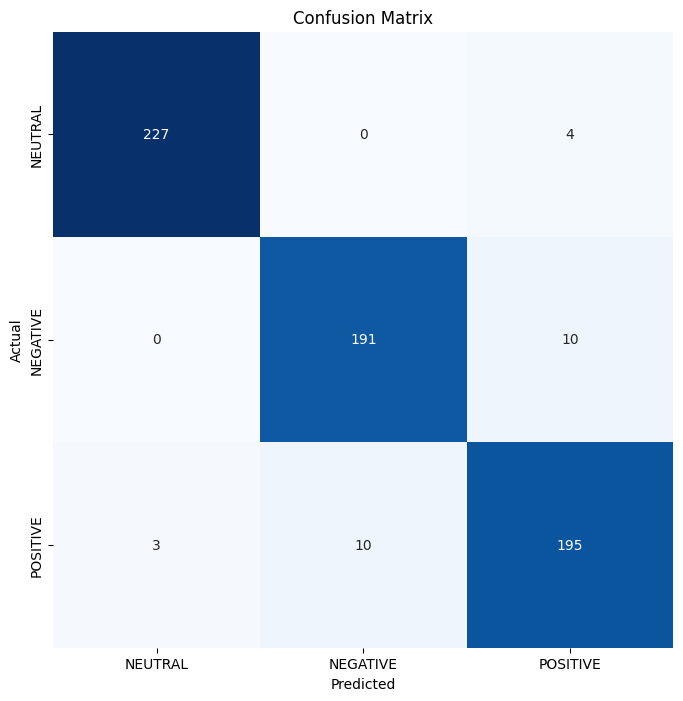

classification_report : 
               precision    recall  f1-score   support

     NEUTRAL       0.99      0.98      0.98       231
    NEGATIVE       0.95      0.95      0.95       201
    POSITIVE       0.93      0.94      0.94       208

    accuracy                           0.96       640
   macro avg       0.96      0.96      0.96       640
weighted avg       0.96      0.96      0.96       640



In [13]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(x_test))))
conf_matrix = confusion_matrix(y_test , y_pred)
cl_r = classification_report(y_test, y_pred, target_names=mapping_label.keys())
plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix , annot=True , vmin=0 , fmt='g' , cbar=False , cmap="Blues")
plt.xticks(np.arange(3) + 0.5 , mapping_label.keys())
plt.yticks(np.arange(3) + 0.5 , mapping_label.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print("classification_report : \n" , cl_r)